### Predictive: What is likely to happen?

### Prescriptive: What do I need to do?



In [1]:
import pandas as pd

## Load data from excel file

In [2]:
df = pd.read_excel('../data/Production Data Versaline.xlsx')
df = df.rename(columns={"Breakdowns and other delays": "BD & other", "Effective production time": "Eff Prod time"})
print(df.columns)
df.head(2)

Index(['Date', 'Product', 'Planned start Time', 'Actual Start Time',
       'Stop Time', 'Total time', 'Startup Delay', 'BD & other',
       'Eff Prod time', 'Operating Speed', 'Produced Qty', 'Rejects Qty',
       'Mix Usage', 'Mix Wastage', 'Mix yield', 'AR', 'PR', 'QR', 'OEE',
       'Mix Per Stick', 'Efficiency', 'Planned Qty'],
      dtype='object')


,Date,Product,Planned start Time,Actual Start Time,Stop Time,Total time,Startup Delay,BD & other,Eff Prod time,Operating Speed,...,Mix Usage,Mix Wastage,Mix yield,AR,PR,QR,OEE,Mix Per Stick,Efficiency,Planned Qty
0,2018-07-02,WB Chocolate,06:30:00,10:30:00,20:30:00,14.0,4.0,5.15,4.85,28880,...,7840.0,991.000,0.873597,0.346429,1.496754,0.873597,0.452976,0.0375,0.499675,NaN
1,2018-07-04,WB Vanilla,06:00:00,18:30:00,20:00:00,14.0,12.5,0.00,1.50,28880,...,1160.0,40.625,0.964978,0.107143,0.716049,0.964978,0.074033,0.0375,0.098710,NaN


### Calculate Rejects percentage and add as a colomn

Rejects percentage = Rejects Qty / Total Qty

In [3]:
# Add rejects percentage

def get_rejects_percentage(row):
    return row["Rejects Qty"]/row["Produced Qty"]

df['Rejects Pct'] = df.apply (lambda row: get_rejects_percentage(row), axis=1)
# df.info()

In [4]:
# df2 = pd.read_excel('../data/Production Data Flexline.xlsx', sheet_name=1)
# print(df2.columns)
# df2.head(2)


AR - Avaliability Rate

PR - Perfromance Rate

QR - Quality Rate

OEE - Overall Equipment Efficiency (AR * PR * QR)

Product |
production Qty |
Breakdown time |
Rejects percentage |

## Select only the useful features
remove duplicate features such as start time and end time

In [5]:
useful_colomns = ["Product", "Produced Qty", "BD & other", 
                  "Startup Delay", "Eff Prod time", "Rejects Pct", "OEE"]
df = df[useful_colomns]

df.head(2)

,Product,Produced Qty,BD & other,Startup Delay,Eff Prod time,Rejects Pct,OEE
0,WB Chocolate,182640,5.15,4.0,4.85,0.144693,0.452976
1,WB Vanilla,29850,0.00,12.5,1.50,0.036293,0.074033


In [6]:
df.Product.unique()

array(['WB Chocolate', 'WB Vanilla', 'JJ Necto', 'MM Watermelon',
       'MM Orange', 'WB Chock Shock', 'WB Berry', '2-Bar Vanilla Faluda',
       'JJ Cream Soda', 'JJ Orange Crush ', 'Ice Cake', 'Bubble Gumy',
       'JJ Creamsoda', 'WB Vnilla', 'Bubble Gummy', 'Ice cake',
       'WB Chocok Shock', 'JJ Orange Crush'], dtype=object)

## Rename Duplicates products with the correct name

In [7]:
df = df.replace({'Product': {"JJ Orange Crush ": "JJ Orange Crush", 
                             "WB Chocok Shock": "WB Chock Shock",
                            "Ice cake": "Ice Cake",
                            "Bubble Gumy":"Bubble Gummy", 
                            "WB Vnilla": "WB Vanilla",
                            "JJ Creamsoda": "JJ Cream Soda"}})
for product in df.Product.unique():
    print("{:15} = {}".format(product, df[df["Product"] == product]["Product"].count()))

WB Chocolate    = 62
WB Vanilla      = 74
JJ Necto        = 45
MM Watermelon   = 51
MM Orange       = 65
WB Chock Shock  = 30
WB Berry        = 16
2-Bar Vanilla Faluda = 65
JJ Cream Soda   = 15
JJ Orange Crush = 8
Ice Cake        = 5
Bubble Gummy    = 5


In [8]:
print("Number of rows: {}".format(df.Product.count()))
df.info()

Number of rows: 441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        441 non-null    object 
 1   Produced Qty   441 non-null    int64  
 2   BD & other     441 non-null    float64
 3   Startup Delay  441 non-null    float64
 4   Eff Prod time  441 non-null    float64
 5   Rejects Pct    440 non-null    float64
 6   OEE            441 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 24.2+ KB


## Fill the NAN values with the mean of the colomn

In [9]:
for val in ["Rejects Pct"]:#["Rejects Pct", "Mix yield"]
    df[val] = df[val].fillna(df[val].mean())
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        441 non-null    object 
 1   Produced Qty   441 non-null    int64  
 2   BD & other     441 non-null    float64
 3   Startup Delay  441 non-null    float64
 4   Eff Prod time  441 non-null    float64
 5   Rejects Pct    441 non-null    float64
 6   OEE            441 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 24.2+ KB


In [10]:
group_by_products = df.groupby(by=['Product'])
product_data_avg = group_by_products.mean()
product_data_count = group_by_products.count()
# print(product_data_avg)
# print(product_data_count)

## Some plots using seaboarn
https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
    

In [11]:
# import seaborn as sns
# %matplotlib inline

# filtered_class = df[df['Product'] == 'WB Chocolate']
# sns.lmplot("OEE", "Rejects Pct", data=filtered_class, fit_reg=False, col='Product', col_wrap=2)

frames = [df[df["Mix yield"].isna()], df[df["Rejects Qty"].isna()]]
pd.concat(frames)

In [12]:
# from matplotlib.ticker import AutoMinorLocator
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(18,6))

# ax1 = sns.violinplot('Product', "OEE", data=df)


# ax1.minorticks_on()
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.grid(which='minor', axis='x', linewidth=1)

In [13]:
# sns.pairplot(df.loc[:,df.dtypes == 'float64'])

In [14]:
# corr = df.loc[:,df.dtypes == 'float64'].corr()
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [15]:
for col in df.columns.values:
    print("{:20} = {}".format(col, df[col].nunique()))

Product              = 12
Produced Qty         = 433
BD & other           = 261
Startup Delay        = 130
Eff Prod time        = 386
Rejects Pct          = 301
OEE                  = 439


## Here we test different regression methods

In [16]:
def test_results(model, features, actual):
    y_pred = model.predict([features])
    print("Result: {}\nActual: {}".format(y_pred[0], actual))
    print("Error:{}\nSqured Error:{}".format(y_pred[0]-actual, (y_pred[0]-actual)**2))

### Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [18]:
# Products as a input
df['Product'] = pd.Categorical(df['Product'])
dfDummies = pd.get_dummies(df['Product'], prefix = 'prod')
# dfDummies.info()
df_p = pd.concat([df, dfDummies], axis=1)
# df_p.info()

In [19]:
# Select only one product
# df_p = df[df['Product']=="WB Chocolate"]
# df_p = df[df['Product']=="MM Orange"]

In [20]:
y = df_p["OEE"]
X = df_p.drop(['Product', 'OEE'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
print("Accuracy:", r2_score(y_test, y_pred))

Accuracy: 0.7519964426286242


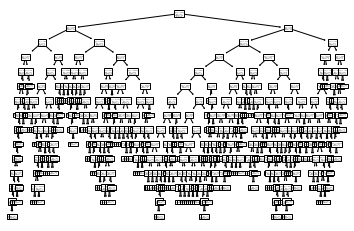

In [21]:
from sklearn import tree
t = tree.plot_tree(regressor)

In [22]:
number = 2
test_results(regressor, X_test.iloc[number], y_test.iloc[number])
# y_pred = regressor.predict([X.loc[number]])
# print("Features: {}\nResult: {}".format(X.loc[number], y_pred))

Result: 0.326785714285714
Actual: 0.355357142857143
Error:-0.02857142857142897
Squred Error:0.0008163265306122677


In [23]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

# plot_colomns = useful_colomns.remove("OEE")#["Total time", "Breakdowns and other delays", "Effective production time", "Produced Qty", "Rejects Qty", "Mix Usage", "Mix Wastage", "Mix yield"]
plot_colomns = list(df_p.columns)
plot_colomns.remove('OEE')
plot_colomns.remove('Product')
print(plot_colomns)
export_graphviz(regressor, out_file=dot_data, feature_names=plot_colomns, class_names=["OEE"], rounded=True, filled=True)

filename = "tree_new.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

# plt.figure(figsize=(12,12))
# img = mpimg.imread(filename)
# imgplot = plt.imshow(img)

# plt.show()

['Produced Qty', 'BD & other', 'Startup Delay', 'Eff Prod time', 'Rejects Pct', 'prod_2-Bar Vanilla Faluda', 'prod_Bubble Gummy', 'prod_Ice Cake', 'prod_JJ Cream Soda', 'prod_JJ Necto', 'prod_JJ Orange Crush', 'prod_MM Orange', 'prod_MM Watermelon', 'prod_WB Berry', 'prod_WB Chock Shock', 'prod_WB Chocolate', 'prod_WB Vanilla']


/home/dulanj/Environments/py376/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


True

In [24]:
# Scale the data
from sklearn.preprocessing import StandardScaler

y = df_p["OEE"]
X = df_p.drop(['Product', 'OEE'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def scale(dataframe, scaler=None):
    colomns_to_scale = ["Produced Qty", "BD & other", "Startup Delay", "Eff Prod time", "Rejects Pct"]
    # Only scale relevenat features
    scaled_features = dataframe.copy()
    features = scaled_features[colomns_to_scale]
    if scaler is None:
        scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features[colomns_to_scale] = features
    return scaled_features, scaler

X_train_s, scaler = scale(X_train)
X_test_s, _ = scale(X_test, scaler)
# X_train_s.head()
# X_test_s.head()

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest_regressor.fit(X_train_s, y_train)
y_pred_t = random_forest_regressor.predict(X_test_s)
print("Accuracy:", r2_score(y_test, y_pred_t))

Accuracy: 0.8504001141460107


### Neural network

Using TensorFlow backend.
/home/dulanj/Environments/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dulanj/Environments/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dulanj/Environments/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dulanj/Environments/py3

Instructions for updating:
Colocations handled automatically by placer.
Input Dimention: 17
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 6,681
Trainable params: 6,681
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Accuracy: 0.8834192315202118


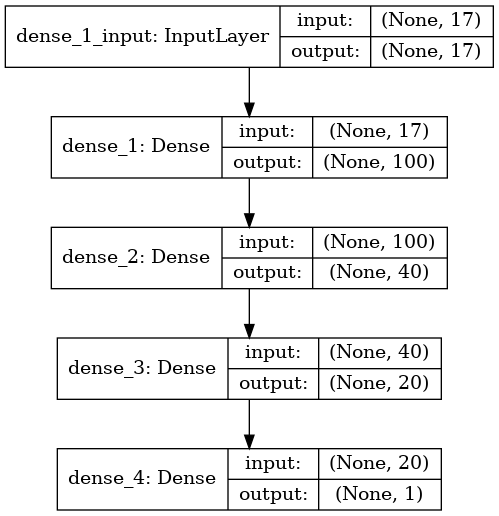

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
input_dim = len(X_train_s.columns)
model.add(Dense(100, input_dim=input_dim, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
print("Input Dimention: {}".format(input_dim))
print(model.summary())

# compile the keras model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

model.fit(X_train_s, y_train, epochs=10, batch_size=10, verbose=0)

y_pred = model.predict(X_test_s)
print("Accuracy:", r2_score(y_test, y_pred))

# SAve model as image
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

In [27]:
number = 3
test_results(regressor, X_test_s.iloc[number], y_test.iloc[number])

Result: 0.549509803921569
Actual: 0.590192043896313
Error:-0.04068223997474396
Squred Error:0.0016550446493626555
